In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Movie_classification2.csv')

In [2]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [3]:
df.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510,0.545455
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764,0.498422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000,1.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             494 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
Oscar                  506 non-null int64
dtypes: float64(12), int64(5), object(2)
memory usage: 75.2+ KB


In [5]:
df.Time_taken = df.Time_taken.fillna(df.Time_taken.mean())

In [6]:
df = pd.get_dummies(df, columns = ["3D_available", "Genre"],drop_first = True)
#drop_first will drop the index col

In [7]:
x = df.loc[:, df.columns != "Oscar"]

In [8]:
x.shape

(506, 20)

In [9]:
y = df["Oscar"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 20) (102, 20) (404,) (102,)


In [13]:
from sklearn import tree

In [14]:
# Decision Tree Classifier

clftree = tree.DecisionTreeClassifier(max_depth=3)

### Data Pruning is the process reducing the tree with optimizing the parameters as in above

In [15]:
clftree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
y_train_pred = clftree.predict(x_train)

In [17]:
y_test_pred = clftree.predict(x_test)

In [18]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score

In [20]:
confusion_matrix(y_test, y_test_pred)

array([[39,  5],
       [41, 17]])

In [21]:
accuracy_score(y_train, y_train_pred)

0.6534653465346535

### Plotting Decision Tree

In [22]:
dot_data = tree.export_graphviz(clftree, out_file = None, feature_names= x_train.columns, filled = True)

In [23]:
from IPython.display import Image

In [24]:
import pydotplus

In [25]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [26]:
dt = Image(graph.create_png())

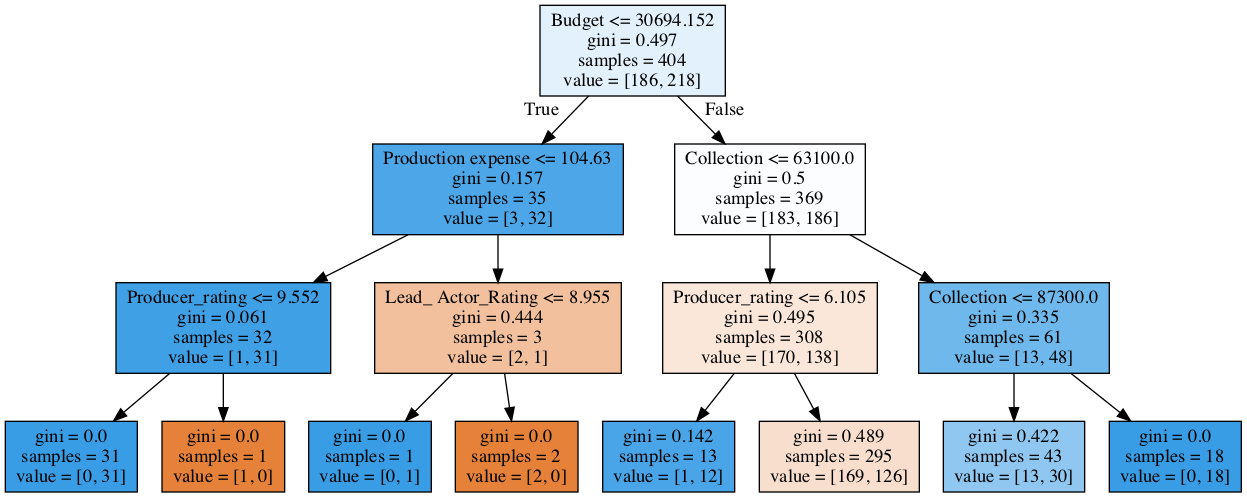

In [27]:
dt

## BAGGING...

In [28]:
from sklearn.ensemble import BaggingClassifier

In [29]:
clftree = tree.DecisionTreeClassifier()

In [30]:
bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators=1000,
                           bootstrap = True, n_jobs = -1, random_state = 42)

#### parameters desc:
* base_estimator - the model that we want to use(classification tree)
* n_estimators - the number of subsets we want to create (1000)
* bootstrap - always take sample with replacement, so the value will be “True”
* oob_score - Suppose retake a sub-set of the data for each tree, the remaining samples new known as out of bag.

In [31]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [32]:
confusion_matrix(y_test, bag_clf.predict(x_test))

array([[28, 16],
       [22, 36]])

In [33]:
accuracy_score(y_train, bag_clf.predict(x_train))

1.0

In [34]:
accuracy_score(y_test, bag_clf.predict(x_test))

0.6274509803921569

## RANDOM FORREST...

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
clftree = tree.DecisionTreeClassifier()

In [37]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [38]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
confusion_matrix(y_test, rf_clf.predict(x_test))

array([[25, 19],
       [18, 40]])

In [40]:
accuracy_score(y_train, rf_clf.predict(x_train))

1.0

In [41]:
accuracy_score(y_test, rf_clf.predict(x_test))

0.6372549019607843

## Grid Search CV..

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
rf_clf = RandomForestClassifier(n_estimators=250, random_state=42)

In [44]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
               "min_samples_split": [2, 3, 10],
              }

### parameters desc:
* max_features - the number of variables we want to consider while creating each individual tree. The default value is the square root of the number of variables in the dataset.
* min_samples_split - the minimum number of observations required at the internal node and we can try out a number of values.

In [45]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs = -1, cv = 5, scoring = 'accuracy')

In [46]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_f

In [47]:
grid_search.best_params_

{'max_features': 7, 'min_samples_split': 3}

In [48]:
cvrf_clf = grid_search.best_estimator_

In [49]:
accuracy_score(y_test, cvrf_clf.predict(x_test))

0.6372549019607843

In [50]:
confusion_matrix(y_test, cvrf_clf.predict(x_test))

array([[27, 17],
       [20, 38]])

## BOOSTING..

### Gradient Boosting..

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gbc_clf = GradientBoostingClassifier()

In [53]:
gbc_clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [54]:
accuracy_score(y_test, gbc_clf.predict(x_test))

0.5784313725490197

In [55]:
confusion_matrix(y_test, gbc_clf.predict(x_test))

array([[25, 19],
       [24, 34]])

In [56]:
#Create a gradient Boosting classifier object with parameters

In [57]:
gbc_clf2 = GradientBoostingClassifier(learning_rate = 0.02,n_estimators = 1000, max_depth = 1)

In [58]:
gbc_clf2.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
accuracy_score(y_train, gbc_clf2.predict(x_train))

0.7623762376237624

In [60]:
accuracy_score(y_test, gbc_clf2.predict(x_test))

0.6176470588235294

In [61]:
#Graph
# dot_data = tree.export_graphviz(gbc_clf2, out_file = None, feature_names= x_train.columns, filled = True)
#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingClassifier

### Ada Boosting..

In [62]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

In [64]:
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.02,
                   n_estimators=5000, random_state=None)

In [65]:
accuracy_score(y_train, ada_clf.predict(x_train))

0.8886138613861386

In [66]:
accuracy_score(y_test, ada_clf.predict(x_test))

0.6274509803921569

In [67]:
#Create the ada Boost classifier object with parameters Random Classifier along with other parameters

In [68]:
ada_clf2 = AdaBoostClassifier(rf_clf, learning_rate = 0.05,n_estimators = 500)

In [69]:
ada_clf2.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=250,
                        

In [70]:
accuracy_score(y_test, ada_clf2.predict(x_test))

0.6470588235294118

### XGBoost..

In [74]:
import xgboost as xgb

In [75]:
xgb_clf = xgb.XGBClassifier(max_depth = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1)

In [77]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [78]:
accuracy_score(y_test, xgb_clf.predict(x_test))

0.6666666666666666

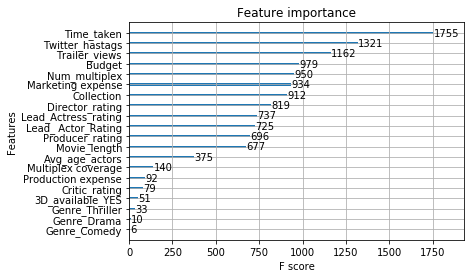

In [79]:
xgb.plot_importance(xgb_clf)

In [80]:
#XG Boost in Python - Grid Search

In [81]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)

In [82]:
param_test1 = { 'max_depth':range(3,10,2),
                'gamma' : [0.1,0.2,0.3], 
                'subsample':[0.8,0.9], 
                'colsample_bytree':[0.8,0.9], 
                'reg_alpha':[ 1e-2, 0.1, 1]
              }

### parameters desc:
* subsample [default=1]

Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.

range: (0,1]

* gamma [default=0, alias: min_split_loss]

Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

range: [0,∞]

* All colsample_by* parameters have a range of (0, 1], the default value of 1, and specify the fraction of columns to be subsampled.

    colsample_bytree is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
    
* alpha [default=0, alias: reg_alpha]

L1 regularization term on weights. Increasing this value will make model more conservative.

In [84]:
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs=-1, cv=5, scoring = 'accuracy')

In [85]:
grid_search.fit(x_train, y_train)

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=250, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_

In [89]:
cvxg_clf = grid_search.best_estimator_
cvxg_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [90]:
accuracy_score(y_test, cvxg_clf.predict(x_test))

0.6470588235294118

In [91]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 9,
 'reg_alpha': 0.01,
 'subsample': 0.8}